## 10.1 k-均值聚类算法

In [1]:
from numpy import *
def loadDataSet(fileNames):
    dataMat=[]
    with open(fileNames) as fr:
        lines=fr.readlines()
        for line in lines:
            curLine=line.strip().split('\t')
            fltLine=map(float,curLine)
            dataMat.append(fltLine)
    return dataMat
    
def dist(vecA,vecB,p=2):
    return power(sum(power(vecA-vecB,p)),1.0/p)
    
def randCent(dataSet,k):
    m=shape(dataSet)[1]
    centroids=mat(zeros((k,m)))
    for j in range(m):
        minJ=min(dataSet[:,j])
        maxJ=max(dataSet[:,j])
        rangeJ=float(maxJ-minJ)
        centroids[:,j]=minJ+rangeJ*random.rand(k,1)
    return centroids

In [2]:
def kMeans(dataSet,k,distMeas=dist,createCent=randCent,maxIter=50):
    n=shape(dataSet)[0]
    clusterAssment=mat(zeros((n,2)))
    
    centroids=createCent(dataSet,k)

    clusterChanged=True
    iterNum=0
    while((iterNum<maxIter) and clusterChanged):
        iterNum+=1
        clusterChanged=False
        for i in range(n):
            minDist=inf
            minIndex=-1
            for j in range(k):
                distJI=distMeas(centroids[j,:],dataSet[i,:])
                if(distJI<minDist):
                    minDist=distJI
                    minIndex=j
            if(clusterAssment[i,0]!=minIndex):
                clusterChanged=True
            clusterAssment[i,:]=minIndex,minDist**2
#         print centroids
        for cent in range(k):
            ptsInClust=dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]
            centroids[cent,:]=mean(ptsInClust,axis=0)
    return centroids,clusterAssment
                    

In [3]:
datMat=mat(loadDataSet('testSet.txt'))

In [4]:
myCentroids,clustAssing=kMeans(datMat,5)

In [5]:
clustAssing

matrix([[  3.00000000e+00,   2.32019150e+00],
        [  2.00000000e+00,   7.53473086e-01],
        [  4.00000000e+00,   6.63839104e+00],
        [  1.00000000e+00,   4.16140951e+00],
        [  3.00000000e+00,   2.76967820e+00],
        [  2.00000000e+00,   1.30816481e+00],
        [  4.00000000e+00,   5.85909807e+00],
        [  1.00000000e+00,   1.50646425e+00],
        [  3.00000000e+00,   2.29348924e+00],
        [  2.00000000e+00,   3.44990565e-01],
        [  4.00000000e+00,   1.74010499e+00],
        [  1.00000000e+00,   3.77769471e-01],
        [  3.00000000e+00,   2.51695402e+00],
        [  0.00000000e+00,   2.83192287e-01],
        [  4.00000000e+00,   9.47633071e+00],
        [  1.00000000e+00,   9.97310599e+00],
        [  3.00000000e+00,   2.39726914e+00],
        [  0.00000000e+00,   7.58629251e-01],
        [  4.00000000e+00,   4.11084375e-01],
        [  1.00000000e+00,   4.74890795e-01],
        [  3.00000000e+00,   1.38706133e-01],
        [  0.00000000e+00,   2.455

## 10.3 二分K-均值算法

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm
def biKmeans(dataSet,k,distMeas=dist,plot=True):
    n=shape(dataSet)[0]
    clusterAssment=mat(zeros((n,2)))
    centroid0=mean(dataSet,axis=0).tolist()[0]
    centList=[centroid0]
    if(plot):
        SSEList=[]
    for j in range(n):
        clusterAssment[j,1]=distMeas(mat(centroid0),dataSet[j,:])**2
    while(len(centList)<k):
        lowestSSE=inf
        for i in range(len(centList)):
            ptsInCurrCluster=dataSet[nonzero(clusterAssment[:,0].A==i)[0],:]
            centroidMat,splitClustAss=kMeans(ptsInCurrCluster,2,distMeas)
            sseSplit=sum(splitClustAss[:,1])
            sseNotSplit=sum(clusterAssment[nonzero(clusterAssment[:,0].A!=i)[0],1])
            if(sseSplit+sseNotSplit<lowestSSE):
                bestCentToSplit=i
                bestNewCents=centroidMat
                bestClustAss=splitClustAss.copy()
                lowestSSE=sseSplit+sseNotSplit
        print 'lowestSSE:%f'%lowestSSE
        if(plot):
            SSEList.append(lowestSSE)
        bestClustAss[nonzero(bestClustAss[:,0].A==1)[0],0]=len(centList)
        bestClustAss[nonzero(bestClustAss[:,0].A==0)[0],0]=bestCentToSplit
        centList[bestCentToSplit]=bestNewCents[0,:].tolist()[0]
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[nonzero(clusterAssment[:,0].A==bestCentToSplit)[0],:]=bestClustAss
    centMat=mat(centList)
    if (plot):
        plt.figure()
        plt.subplot(211)
        plt.plot(SSEList)
        plt.subplot(212)
        for j in range(len(centList)):
            colors=['b','c','g','k','m','r','w','y']
            index1=random.randint(8)
            markers=['o','v','^','<','>']
            index2=random.randint(5)
            plt.scatter(dataSet[nonzero(clusterAssment[:,0].A==j)[0],:][:,0],dataSet[nonzero(clusterAssment[:,0].A==j)[0],:][:,1],color=colors[index1],marker=markers[index2])
            plt.scatter(centMat[j][:,0],centMat[j][:,1],color=colors[index1],marker='+',s=100)
        plt.show()

    return centMat, clusterAssment

In [7]:
datMat3=mat(loadDataSet('testSet2.txt'))

lowestSSE:541.297629
lowestSSE:106.749499
lowestSSE:90.345512
lowestSSE:73.573421
lowestSSE:60.972495
lowestSSE:47.575975
lowestSSE:39.864965


/usr/local/Cellar/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/usr/local/Cellar/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


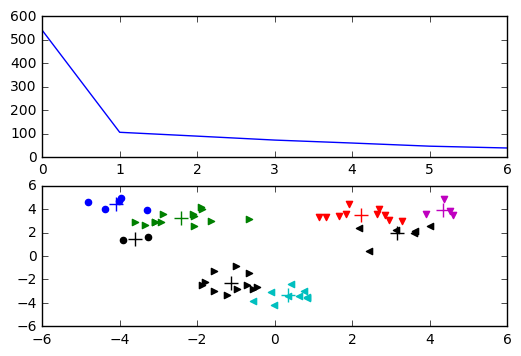

In [8]:
centList,clusterAssment=biKmeans(datMat3,8)